In [ ]:
import pandas as pd

### Preliminary Data Analysis

In [ ]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'])
print(df.head(), '\n')
print(df.tail())

In [ ]:
print(f'''
    Number of rows: {df.shape[0]}
    Number of cols: {df.shape[1]}
    ''')

print('Number of entries: \n', df.count())

### Programming Language with most posts (based on tag)

In [ ]:
# Top 3 Prog. Lang. with most posts
clean_df = df.dropna()
clean_df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

### Months of Post for each programming language

In [ ]:
clean_df.groupby('TAG')['DATE'].count().sort_values(ascending=False)
# newer languages will have fewer count of months posted

### Working with Timestamps

In [ ]:
type(clean_df['DATE'][1])

clean_df['DATE'] = pd.to_datetime(clean_df['DATE'])
clean_df.head()

### Pivoting Tables
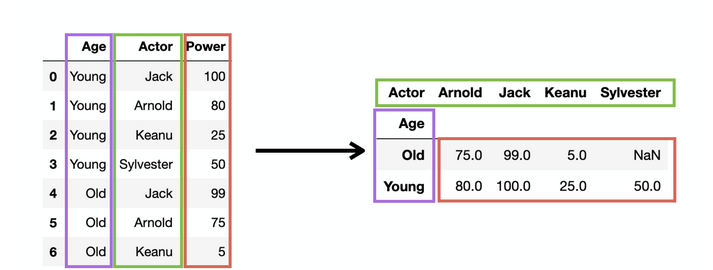

In [ ]:
pivoted_df = clean_df.pivot(
    index='DATE',
    columns='TAG',
    values='POSTS'
).fillna(0)

In [ ]:
pivoted_df.head()

In [ ]:
pivoted_df.shape

In [ ]:
pivoted_df.columns

### Data Visualization (Matplotlib)

In [ ]:
import matplotlib.pyplot as plt

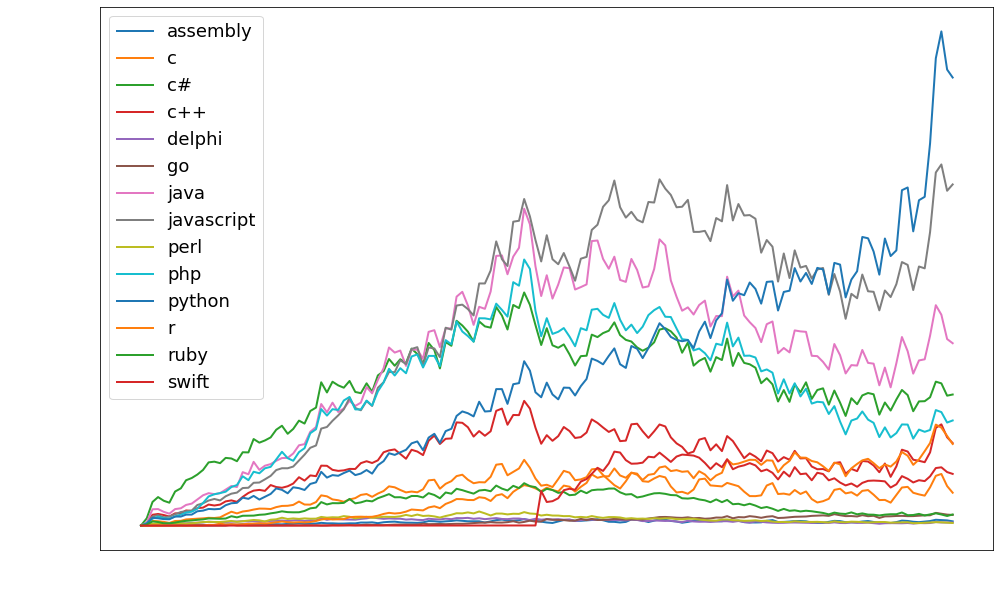

In [92]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot()

# ax.plot(pivoted_df.index, pivoted_df['java'], label='java')
# ax.plot(pivoted_df.index, pivoted_df['python'], label='python')
for col in pivoted_df.columns:
    ax.plot(pivoted_df.index, pivoted_df[col], linewidth=2, label=pivoted_df[col].name)

ax.tick_params(axis='both', colors='white', labelsize=16, size=16)
plt.xlabel('Date', fontsize=20, color='white')
plt.ylabel('No. of Posts', fontsize=20, color='white')

plt.legend(fontsize="18")
plt.show()

### Smoothing out Time-Series Data
* used when many spikes up and down
* Averaging 6 - 12 observations within a window of time (rolling mean)
* pandas has built-in rolling() or mean()

In [94]:
roll_df = pivoted_df.rolling(
    window=6
).mean()

print(roll_df.shape)
roll_df.head()

(145, 14)


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


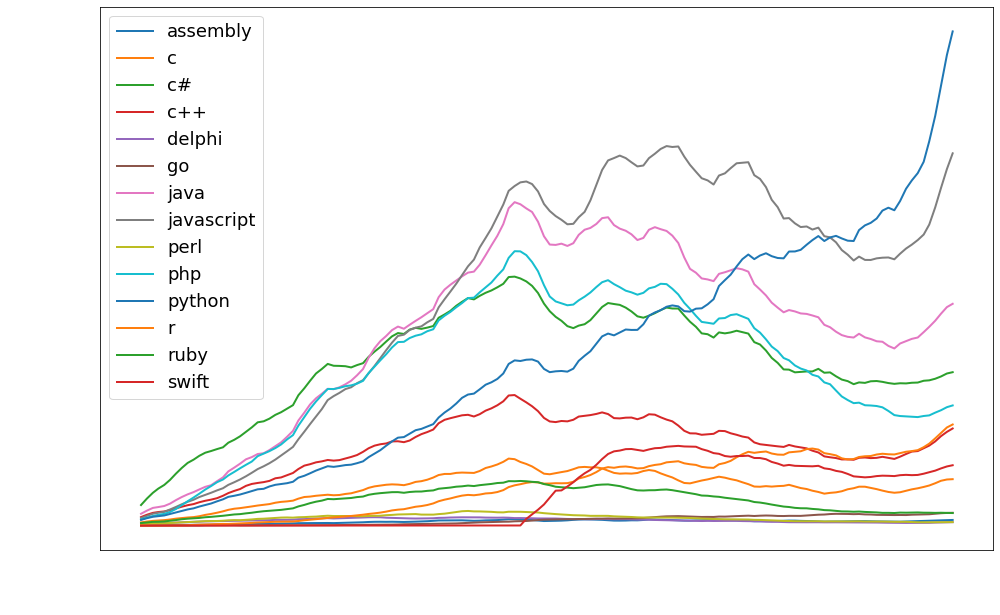

In [95]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot()

# ax.plot(pivoted_df.index, pivoted_df['java'], label='java')
# ax.plot(pivoted_df.index, pivoted_df['python'], label='python')
for col in roll_df.columns:
    ax.plot(roll_df.index, roll_df[col], linewidth=2, label=roll_df[col].name)

ax.tick_params(axis='both', colors='white', labelsize=16, size=16)
plt.xlabel('Date', fontsize=20, color='white')
plt.ylabel('No. of Posts', fontsize=20, color='white')

plt.legend(fontsize="18")
plt.show()